In [37]:
import pandas as pd

data = {
    'date': pd.date_range(start='2023-07-01', periods=10),
    'dau': [100, 110, 105, 120, 115, 200, 125, 140, 135, 150]
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

In [38]:
# Moving Average (SMA): The SMA smooths out the data, making it easier to spot trends and patterns.
# Standard Deviation: Measures data variability and helps create a confidence band.
# Confidence Band: The upper and lower bands provide a range within which we expect the DAU to fall. If the DAU falls outside this range, it might be considered an anomaly.
# Anomalies: In this example, all DAU values fall within the confidence bands, so no anomalies are detected.
# where, k is a confidence multiplier (e.g., 2 for a 95% confidence interval).

In [39]:
window_size = 3
df['SMA'] = df['dau'].rolling(window=window_size).mean()
df.head()

,dau,SMA
date,,
2023-07-01,100,NaN
2023-07-02,110,NaN
2023-07-03,105,105.000000
2023-07-04,120,111.666667
2023-07-05,115,113.333333


In [40]:
# Will use these stadard values of every windows to find the anomalies

df['STD'] = df['dau'].rolling(window=window_size).std()
df.head(10)

,dau,SMA,STD
date,,,
2023-07-01,100,NaN,NaN
2023-07-02,110,NaN,NaN
2023-07-03,105,105.000000,5.000000
2023-07-04,120,111.666667,7.637626
2023-07-05,115,113.333333,7.637626
2023-07-06,200,145.000000,47.696960
2023-07-07,125,146.666667,46.457866
2023-07-08,140,155.000000,39.686270
2023-07-09,135,133.333333,7.637626


In [41]:
confidence_multiplier = 2
df['Upper_Band'] = df['SMA'] + confidence_multiplier * df['STD']
df['Lower_Band'] = df['SMA'] - confidence_multiplier * df['STD']
df.head()

,dau,SMA,STD,Upper_Band,Lower_Band
date,,,,,
2023-07-01,100,NaN,NaN,NaN,NaN
2023-07-02,110,NaN,NaN,NaN,NaN
2023-07-03,105,105.000000,5.000000,115.000000,95.000000
2023-07-04,120,111.666667,7.637626,126.941919,96.391414
2023-07-05,115,113.333333,7.637626,128.608586,98.058081


In [42]:
df['Anomaly'] = (df['dau'] > df['Upper_Band']) | (df['dau'] < df['Lower_Band'])
df.head(10)

,dau,SMA,STD,Upper_Band,Lower_Band,Anomaly
date,,,,,,
2023-07-01,100,NaN,NaN,NaN,NaN,False
2023-07-02,110,NaN,NaN,NaN,NaN,False
2023-07-03,105,105.000000,5.000000,115.000000,95.000000,False
2023-07-04,120,111.666667,7.637626,126.941919,96.391414,False
2023-07-05,115,113.333333,7.637626,128.608586,98.058081,False
2023-07-06,200,145.000000,47.696960,240.393920,49.606080,False
2023-07-07,125,146.666667,46.457866,239.582399,53.750934,False
2023-07-08,140,155.000000,39.686270,234.372539,75.627461,False
2023-07-09,135,133.333333,7.637626,148.608586,118.058081,False


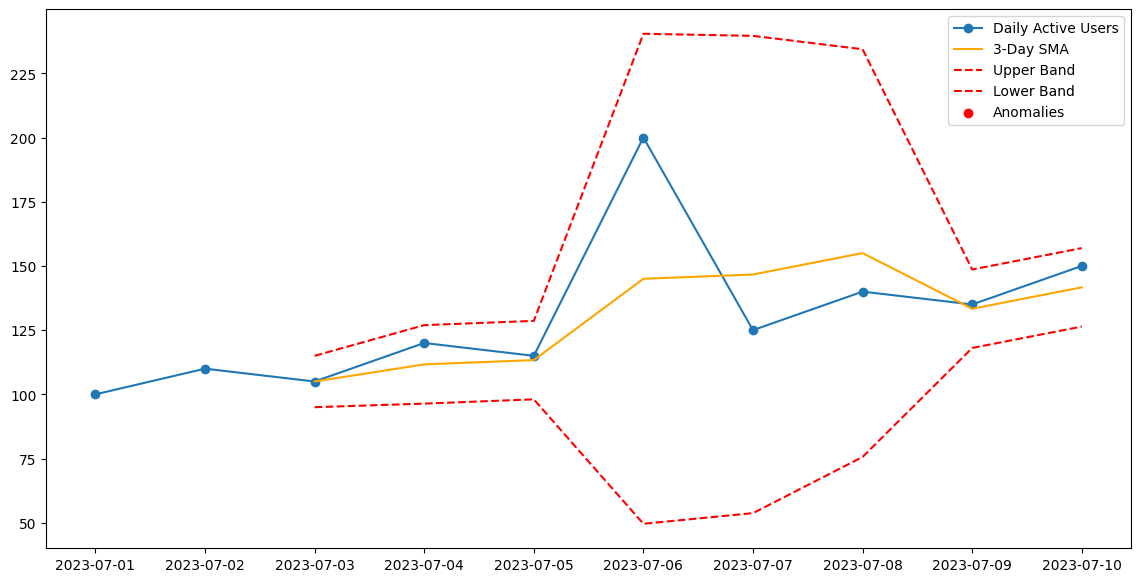

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['dau'], label='Daily Active Users', marker='o')
plt.plot(df['SMA'], label='3-Day SMA', color='orange')
plt.plot(df['Upper_Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(df['Lower_Band'], label='Lower Band', color='red', linestyle='--')
plt.scatter(df[df['Anomaly']].index, df[df['Anomaly']]['dau'], color='red', label='Anomalies')
plt.legend()
plt.show()
